In [82]:
# train the COPOD detector
from pyod.models.copod import COPOD
import pandas as pd
from pyod.utils.utility import standardizer

In [83]:
clf = COPOD()

In [84]:
df = pd.read_pickle('../data/unsw-small.pickle')
df = df.append(pd.read_pickle('../data/davidsSet.pickle'))

In [85]:
df.reset_index(inplace=True)

In [86]:
del df["index"]

In [87]:
del df["label"]

In [88]:
df.describe()

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,733265.000000,733265.000000,7.332650e+05,733265.000000,7.332650e+05
mean,2.814143,11.649406,1.631598e+04,106.352608,6.393653e+05
std,324.059554,616.956662,4.931782e+06,516.432351,3.352932e+06
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000010,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,0.000414,1.000000,4.000000e+01,1.000000,4.000000e+01
75%,0.195154,2.000000,2.000000e+02,6.000000,2.680000e+02
max,175548.663295,193507.000000,2.825661e+09,201907.000000,1.907229e+09


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
data = df.duration[:600000]
data = data.values
X_train = data

X_test = df[600001:]
X_test = X_test.values

In [92]:
X_train.reshape()

array([1.214780e-01, 6.499020e-01, 1.623129e+00, ..., 1.530000e-04,
       8.453200e-01, 3.260000e-04])

In [91]:
X_train_norm = standardizer(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1.214780e-01 6.499020e-01 1.623129e+00 ... 1.530000e-04 8.453200e-01
 3.260000e-04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [70]:



clf.fit(X_train)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [71]:
import numpy as np

In [72]:
np.mean(y_train_scores)

5.352735638502304

In [73]:
np.mean(y_test_scores)

4.256551266679719

<AxesSubplot:>

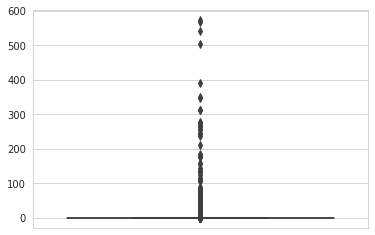

In [81]:
# import libraries
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
# data

# create boxplot
sns.boxplot(y = X_train_norm)

In [80]:
X_train_norm

array([[-0.00830917, -0.0091569 , -0.00325602, -0.19819184, -0.19063723],
       [-0.00667853,  0.00380998, -0.00315951, -0.13235549, -0.178158  ],
       [-0.0036753 , -0.00591518, -0.00323453, -0.17495548, -0.18675585],
       ...,
       [-0.00840839, -0.01564034, -0.00329211, -0.20400093, -0.1906766 ],
       [-0.00757325, -0.00429432, -0.00286387, -0.20593729, -0.19068853],
       [-0.00868404, -0.01888206, -0.00330834, -0.20593729, -0.19068853]])